# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
latRange = (-90, 90)
lngRange = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(latRange[0], latRange[1], size=1500)
lngs = np.random.uniform(lngRange[0], lngRange[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


queryURL = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    cityURL = queryURL + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        cityWeather = requests.get(cityURL).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = cityWeather["coord"]["lat"]
        city_lng = cityWeather["coord"]["lon"]
        city_max_temp = cityWeather["main"]["temp_max"]
        city_humidity = cityWeather["main"]["humidity"]
        city_clouds = cityWeather["clouds"]["all"]
        city_wind = cityWeather["wind"]["speed"]
        city_country = cityWeather["sys"]["country"]
        city_date = cityWeather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | moyynkum
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | opuwo
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | nar'yan-mar
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | coahuayana de hidalgo
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | beau vallon
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | funtua
Processing Record 22 of Set 1 | gadzhiyevo
P

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [5]:
# Convert the cities weather data into a Pandas DataFrame
cityDataDF = pd.DataFrame(city_data)

# Show Record Count
cityDataDF.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
# Display sample data
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,moyynkum,44.2914,72.9469,15.96,81,87,14.56,KZ,1738728157
1,atafu village,-8.5421,-172.5159,83.44,70,15,12.53,TK,1738728157
2,port-aux-francais,-49.3500,70.2167,42.33,97,96,24.67,TF,1738728157
3,grytviken,-54.2811,-36.5092,36.63,88,69,18.12,GS,1738728157
4,port elizabeth,-33.9180,25.5701,71.31,99,94,11.99,ZA,1738727976


In [8]:
# Export the cityDataDF into a csv with new index for City_ID
cityDataDF.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data from the output_data folder and City_ID to its own column
cityDataDF = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,moyynkum,44.2914,72.9469,15.96,81,87,14.56,KZ,1738728157
1,atafu village,-8.5421,-172.5159,83.44,70,15,12.53,TK,1738728157
2,port-aux-francais,-49.3500,70.2167,42.33,97,96,24.67,TF,1738728157
3,grytviken,-54.2811,-36.5092,36.63,88,69,18.12,GS,1738728157
4,port elizabeth,-33.9180,25.5701,71.31,99,94,11.99,ZA,1738727976


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

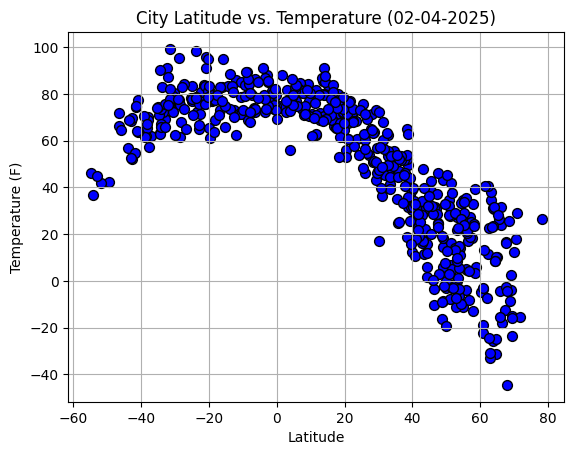

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    cityDataDF["Lat"],
    cityDataDF["Max Temp"],
    color="b",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

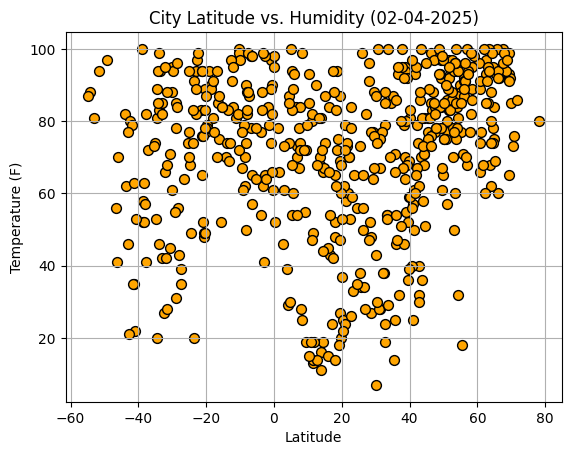

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    cityDataDF["Lat"],
    cityDataDF["Humidity"],
    color="orange",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

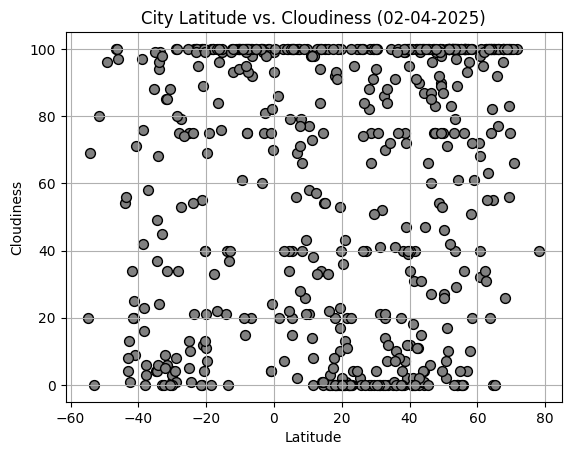

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    cityDataDF["Lat"],
    cityDataDF["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

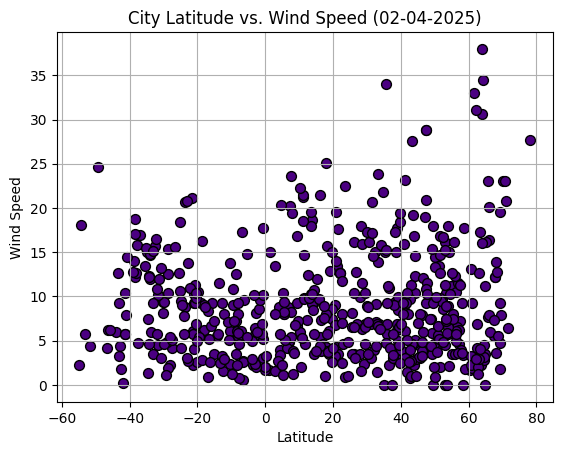

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    cityDataDF["Lat"],
    cityDataDF["Wind Speed"],
    color="indigo",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
        
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2))  + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values,y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northernHemiDF = cityDataDF.loc[(cityDataDF["Lat"] >= 0)]


# Display sample data
northernHemiDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,moyynkum,44.2914,72.9469,15.96,81,87,14.56,KZ,1738728157
5,bilibino,68.0546,166.4372,-44.46,94,26,3.60,RU,1738728158
7,klyuchi,52.2667,79.1667,14.59,94,83,9.69,RU,1738728158
9,iqaluit,63.7506,-68.5145,-25.87,68,20,2.30,CA,1738728158
11,nar'yan-mar,67.6713,53.0870,16.45,95,100,12.17,RU,1738728158


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southernHemiDF = cityDataDF.loc[(cityDataDF["Lat"] < 0)]

# Display sample data
southernHemiDF .head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,83.44,70,15,12.53,TK,1738728157
2,port-aux-francais,-49.3500,70.2167,42.33,97,96,24.67,TF,1738728157
3,grytviken,-54.2811,-36.5092,36.63,88,69,18.12,GS,1738728157
4,port elizabeth,-33.9180,25.5701,71.31,99,94,11.99,ZA,1738727976
6,adamstown,-25.0660,-130.1015,77.54,77,13,10.60,PN,1738728087


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7631059073947377


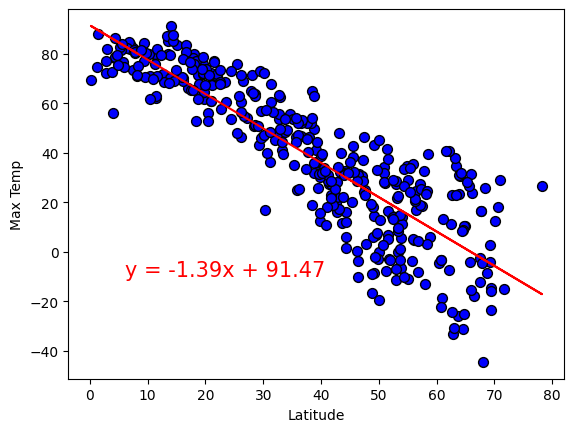

In [21]:
# Linear regression on Northern Hemisphere
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (6,-10), "blue")

The r-value is: 0.27601151060226226


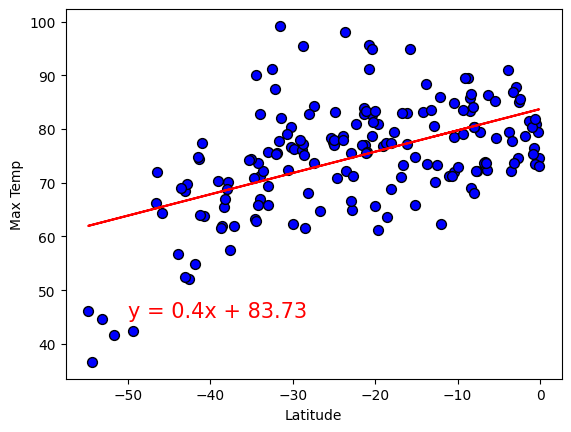

In [29]:
# Linear regression on Southern Hemisphere
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp",(-50,45), "blue")

**Discussion about the linear relationship:** The high r value .76 for the Northern Hemisphere displays a strong positive correlation between latitude and max temperature, while the low r value of .27 indicates a weak positive correlation in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19688382737511656


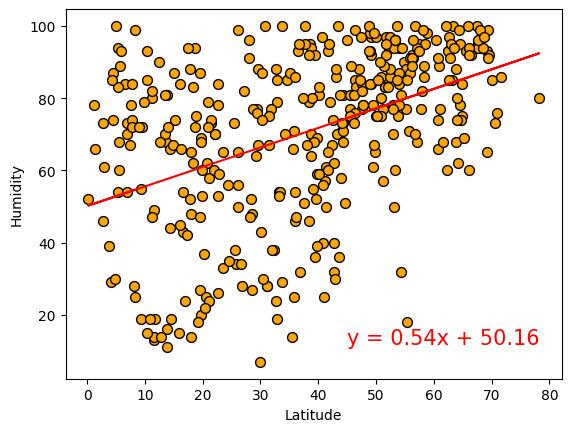

In [37]:
# Northern Hemisphere
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (45,12), "orange")

The r-value is: 0.0705044954713424


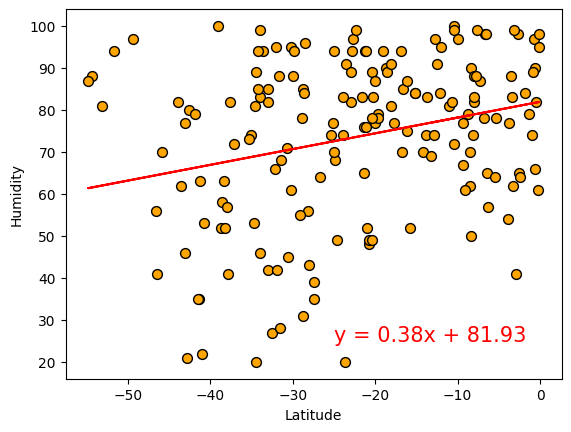

In [38]:
# Southern Hemisphere
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (-25,25), "orange")

**Discussion about the linear relationship:** The low r value ~.20 for the Northern Hemisphere displays a very weakpositive correlation between latitude and humidity, while the r value of .07 indicates little to no correlation in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05483163350304537


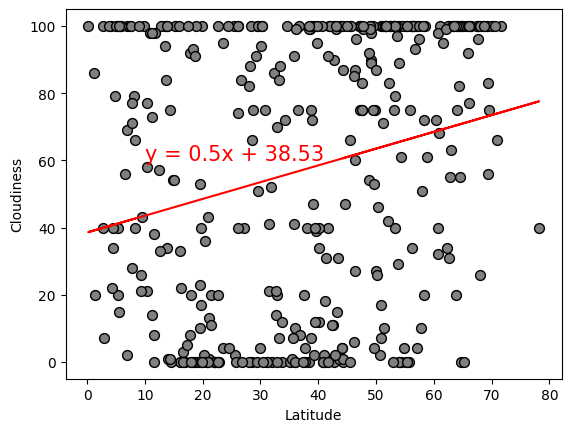

In [43]:
# Northern Hemisphere
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (10,60), "gray")

The r-value is: 0.14320525108976648


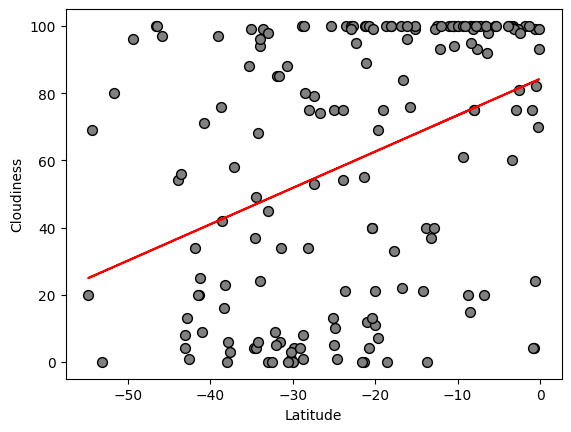

In [44]:
# Southern Hemisphere
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (6,-10), "gray")

**Discussion about the linear relationship:** Both low r values display a weak relationship between latitude and cloudiness in the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0053752243231842325


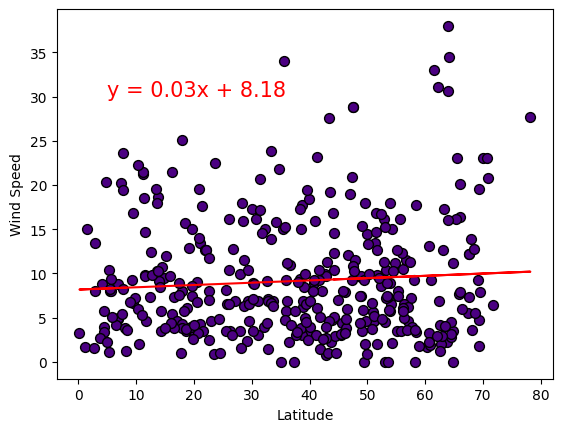

In [47]:
# Northern Hemisphere
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (5,30), "indigo")

The r-value is: 0.07122872323995615


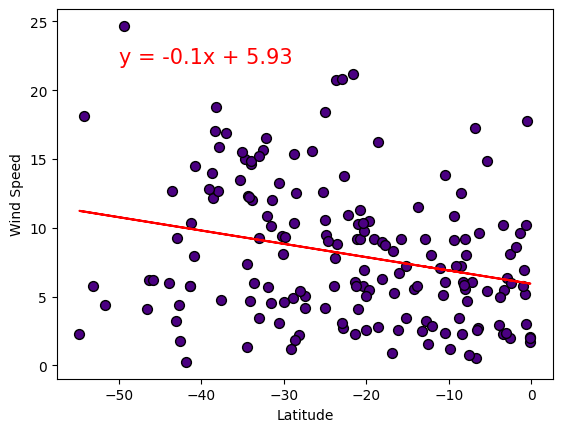

In [48]:
# Southern Hemisphere
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (-50,22), "indigo")

**Discussion about the linear relationship:** Both low r values display a weak relationship between latitude and wind speed in the Northern and Southern Hemispheres